In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD003.csv")


# Understanding the dataset

In [3]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (24720, 27)


In [4]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  -0.0005   0.0004    100.0   518.67   642.36  1583.23   
1       1       2   0.0008  -0.0003    100.0   518.67   642.50  1584.69   
2       1       3  -0.0014  -0.0002    100.0   518.67   642.18  1582.35   
3       1       4  -0.0020   0.0001    100.0   518.67   642.92  1585.61   
4       1       5   0.0016   0.0000    100.0   518.67   641.68  1588.63   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1396.84    14.62  ...   2388.01   8145.32    8.4246      0.03       391   
1  1396.89    14.62  ...   2388.03   8152.85    8.4403      0.03       392   
2  1405.61    14.62  ...   2388.00   8150.17    8.3901      0.03       391   
3  1392.27    14.62  ...   2388.08   8146.56    8.3878      0.03       392   
4  1397.65    14.62  ...   2388.03   8147.80    8.3869      0.03       392   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [5]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [6]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            24720 non-null  int64  
 1   Cycles            24720 non-null  int64  
 2   Sensor1           24720 non-null  float64
 3   Sensor2           24720 non-null  float64
 4   Sensor3           24720 non-null  float64
 5   Sensor4           24720 non-null  float64
 6   Sensor5           24720 non-null  float64
 7   Sensor6           24720 non-null  float64
 8   Sensor7           24720 non-null  float64
 9   Sensor8           24720 non-null  float64
 10  Sensor9           24720 non-null  float64
 11  Sensor10          24720 non-null  float64
 12  Sensor11          24720 non-null  float64
 13  Sensor12          24720 non-null  float64
 14  Sensor13          24720 non-null  float64
 15  Sensor14          24720 non-null  float64
 16  Sensor15          24720 non-null  float6

In [7]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2  Sensor3  \
count  24720.000000  24720.000000  24720.000000  24720.000000  24720.0   
mean      48.631877    139.077063     -0.000024      0.000005    100.0   
std       29.348985     98.846675      0.002194      0.000294      0.0   
min        1.000000      1.000000     -0.008600     -0.000600    100.0   
25%       23.000000     62.000000     -0.001500     -0.000200    100.0   
50%       47.000000    124.000000     -0.000000     -0.000000    100.0   
75%       74.000000    191.000000      0.001500      0.000300    100.0   
max      100.000000    525.000000      0.008600      0.000700    100.0   

        Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  ...  \
count  24720.00  24720.000000  24720.000000  24720.000000  2.472000e+04  ...   
mean     518.67    642.457858   1588.079175   1404.471212  1.462000e+01  ...   
std        0.00      0.523031      6.810418      9.773178  3.552786e-

# Data visualization

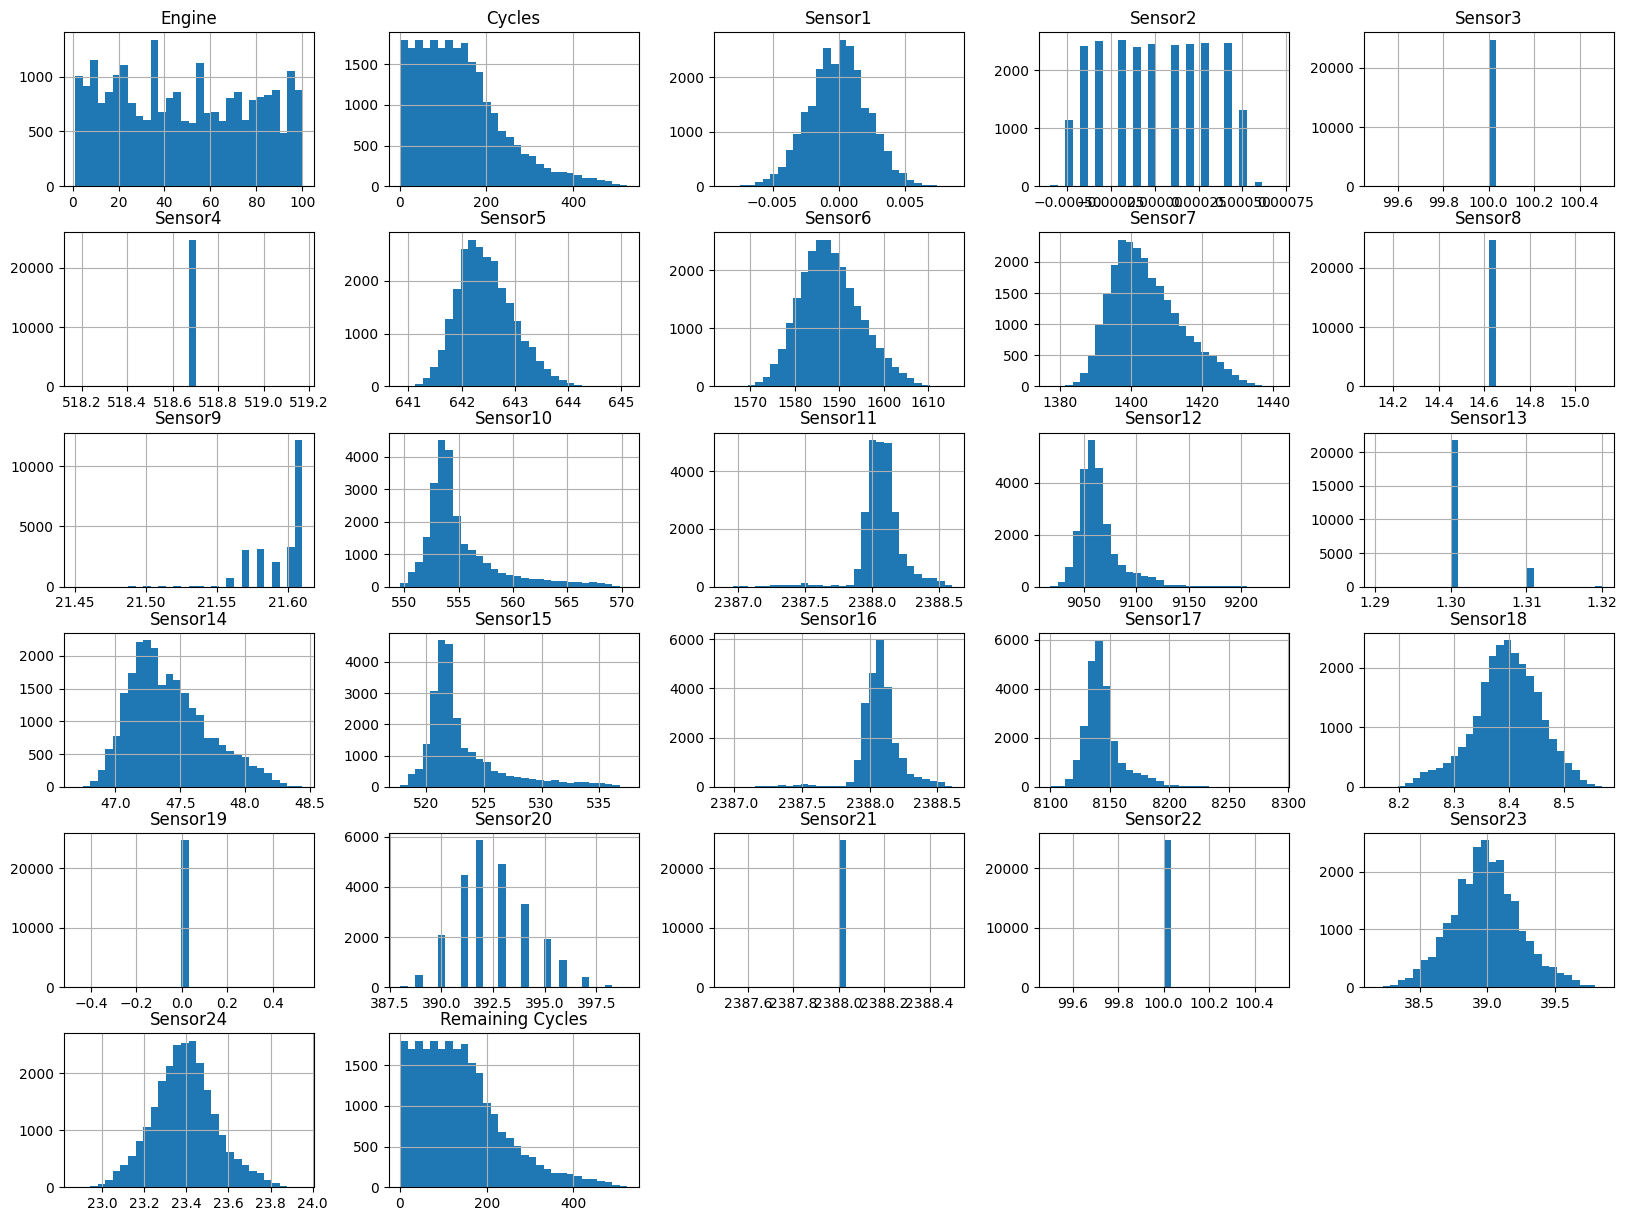

In [8]:
# Histograms

data.hist(bins=30, figsize=(20,15))
plt.show()

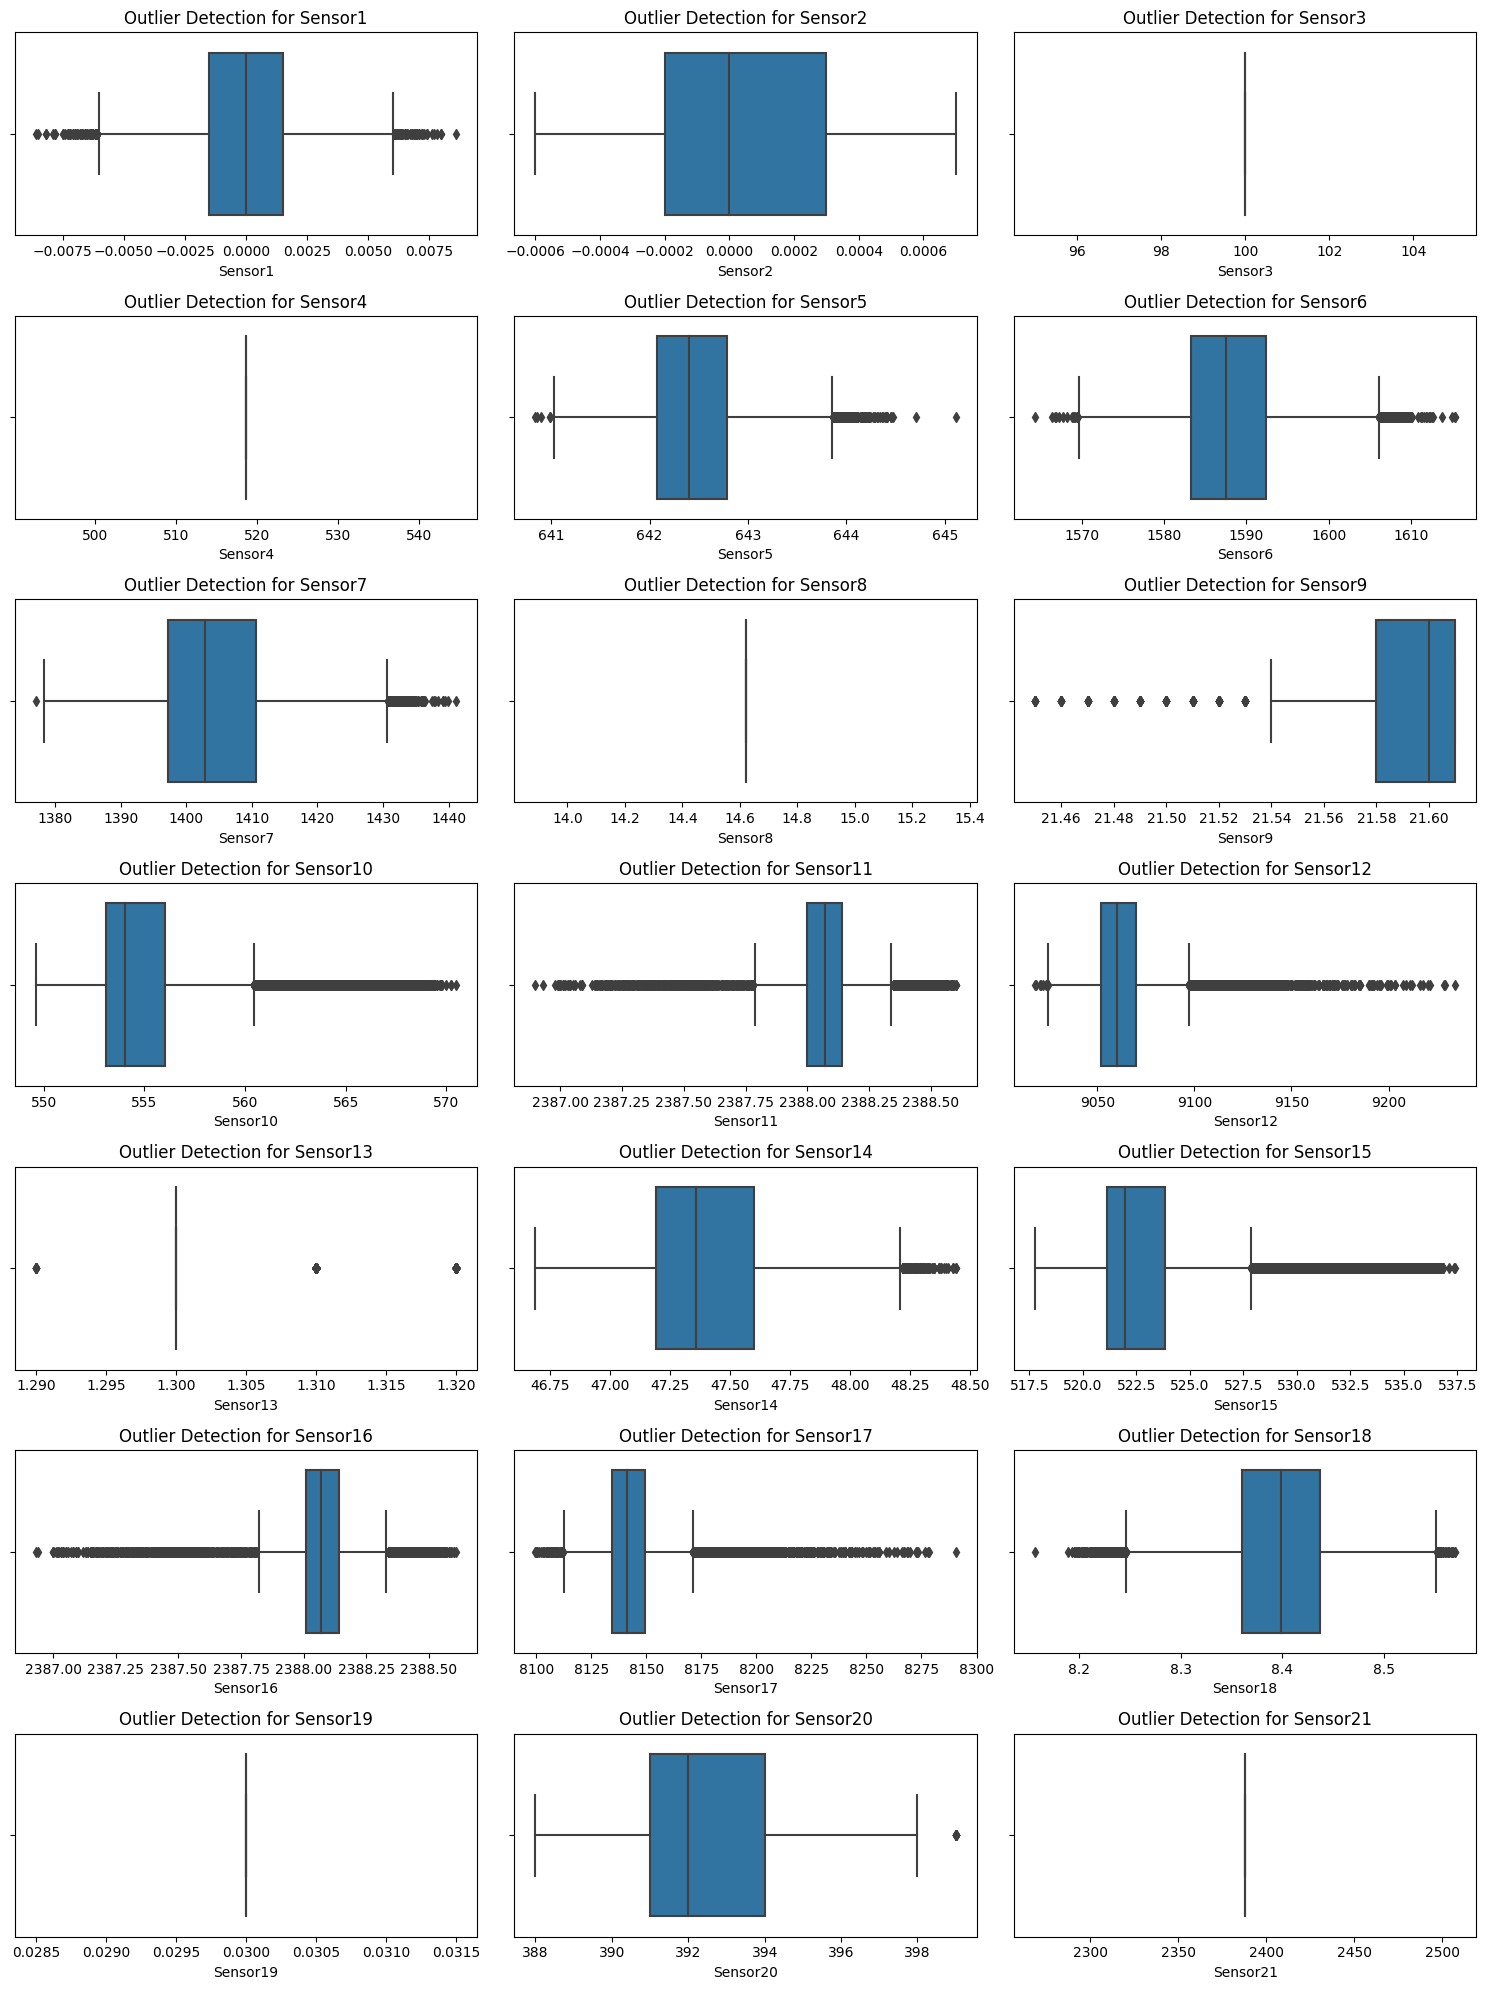

In [9]:
# Boxplots for outlier detection

fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.ravel()

for i, col in enumerate(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19', 'Sensor20', 'Sensor21']):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")

plt.tight_layout()
plt.show()

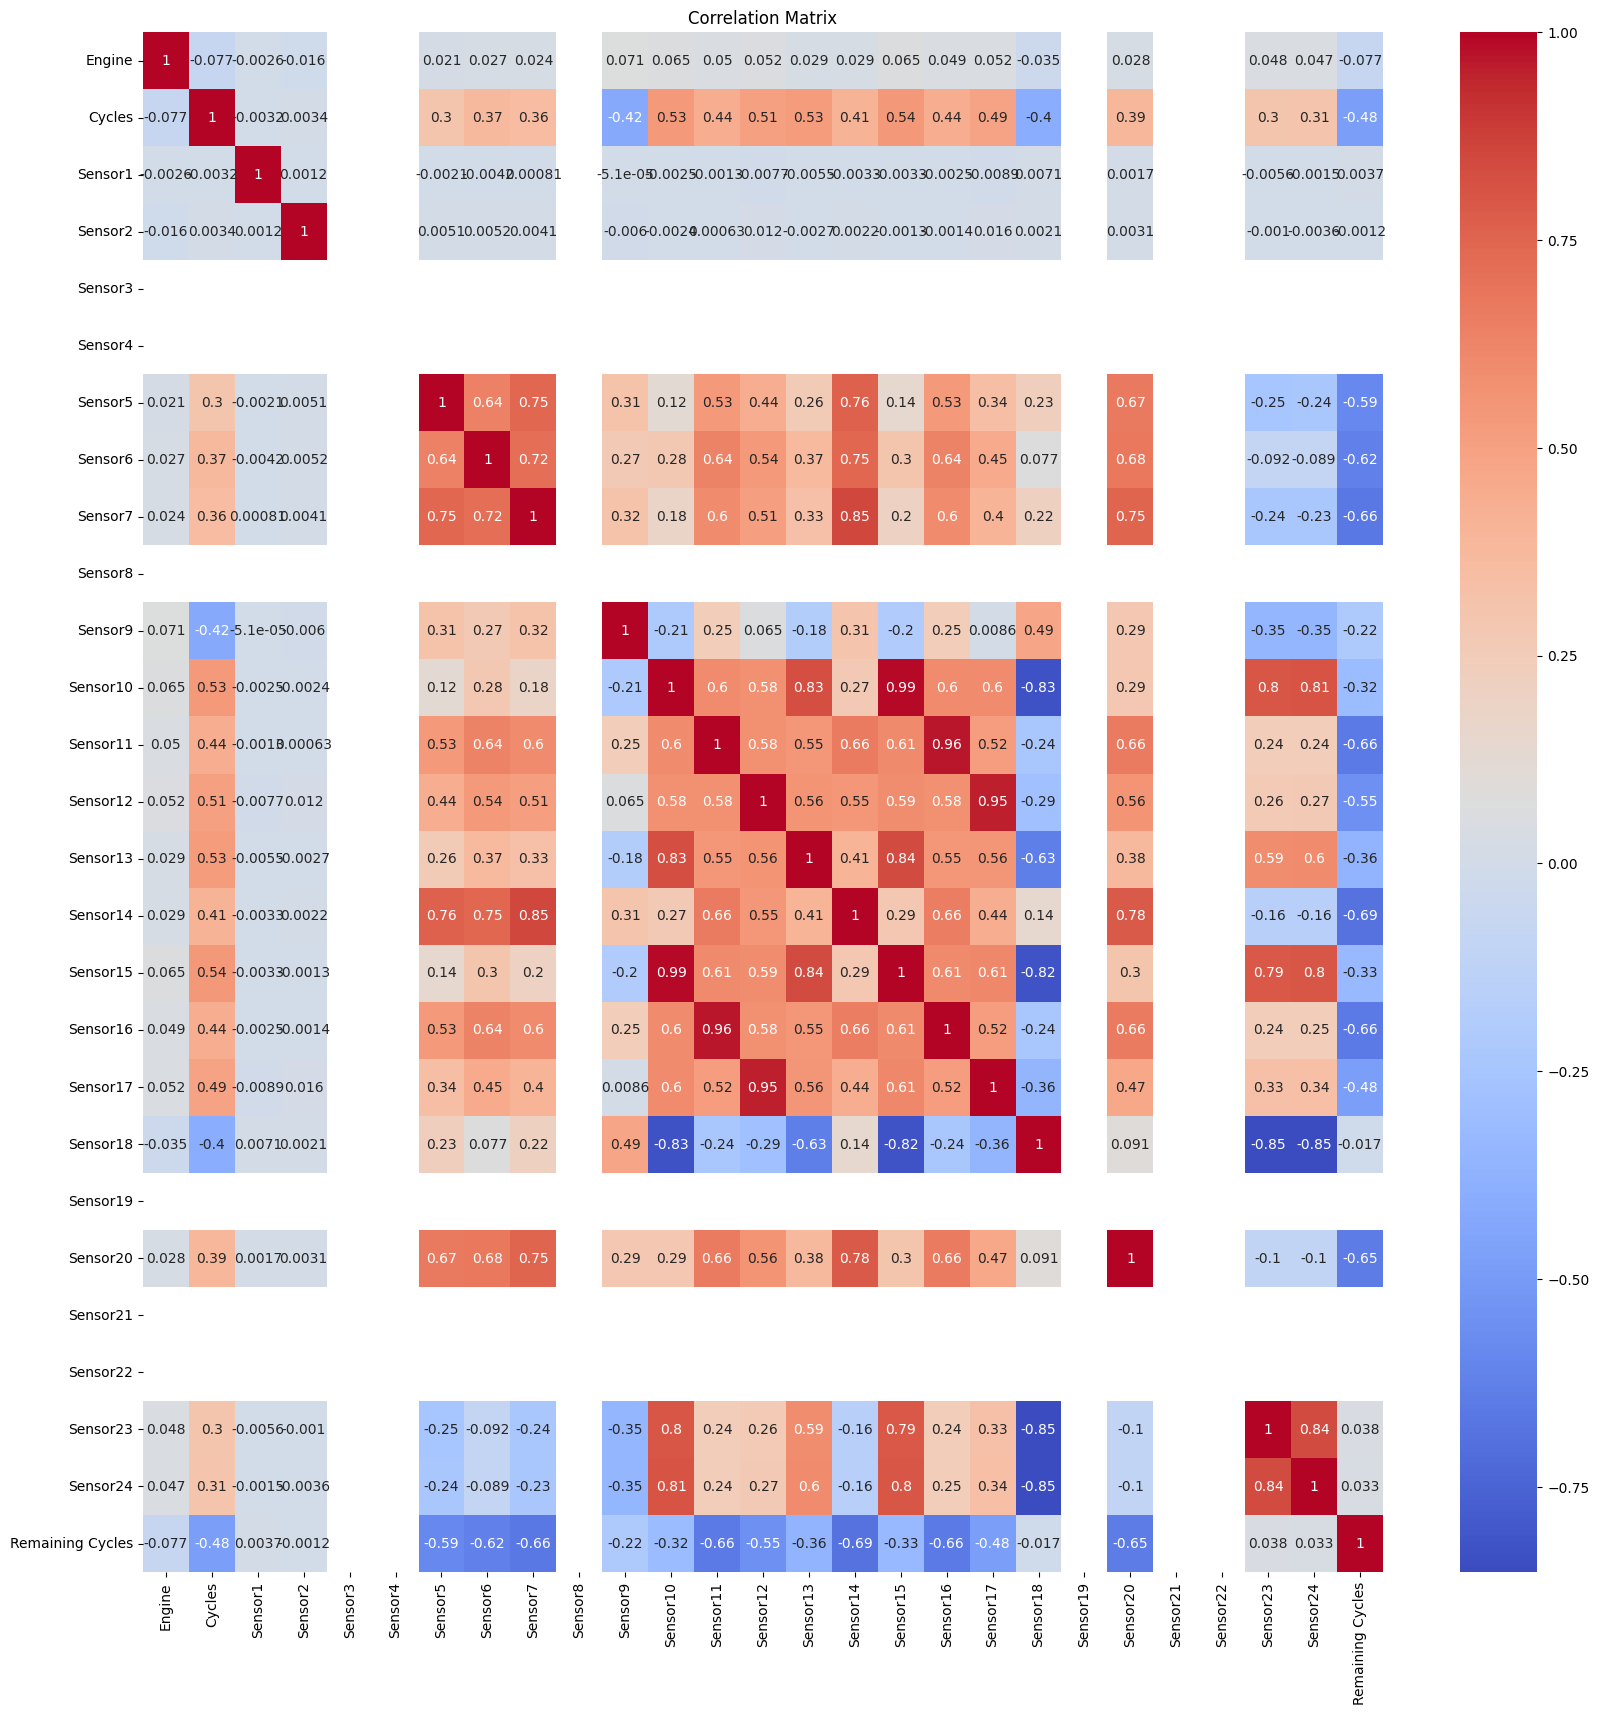

In [10]:
# Correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

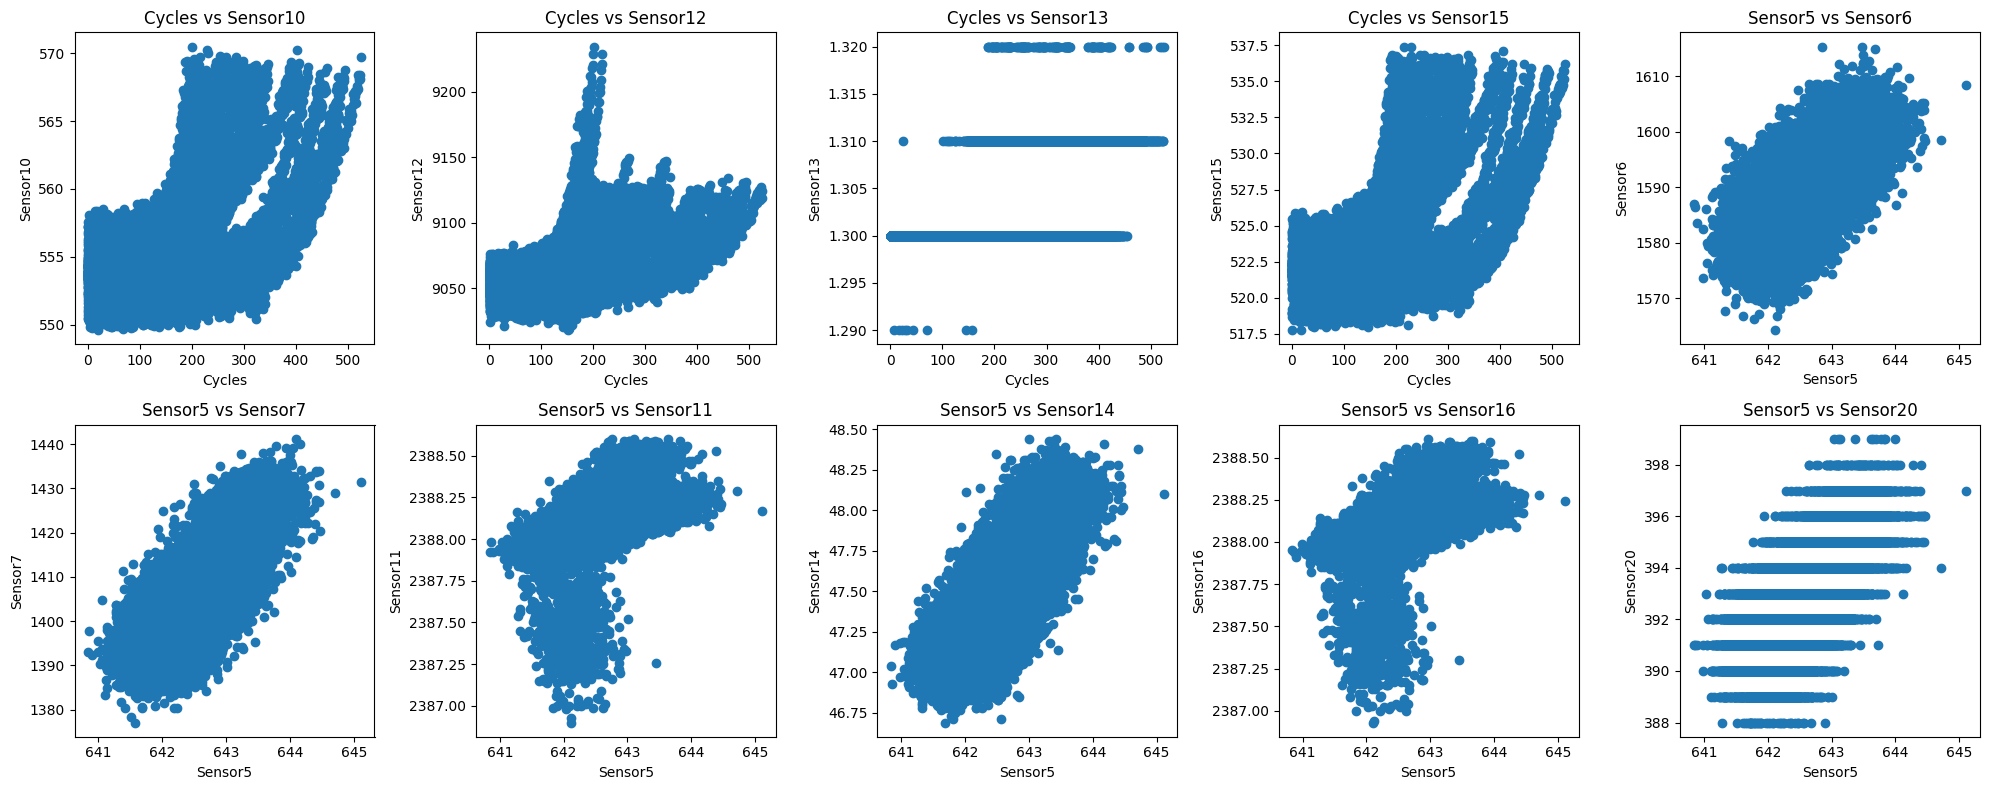

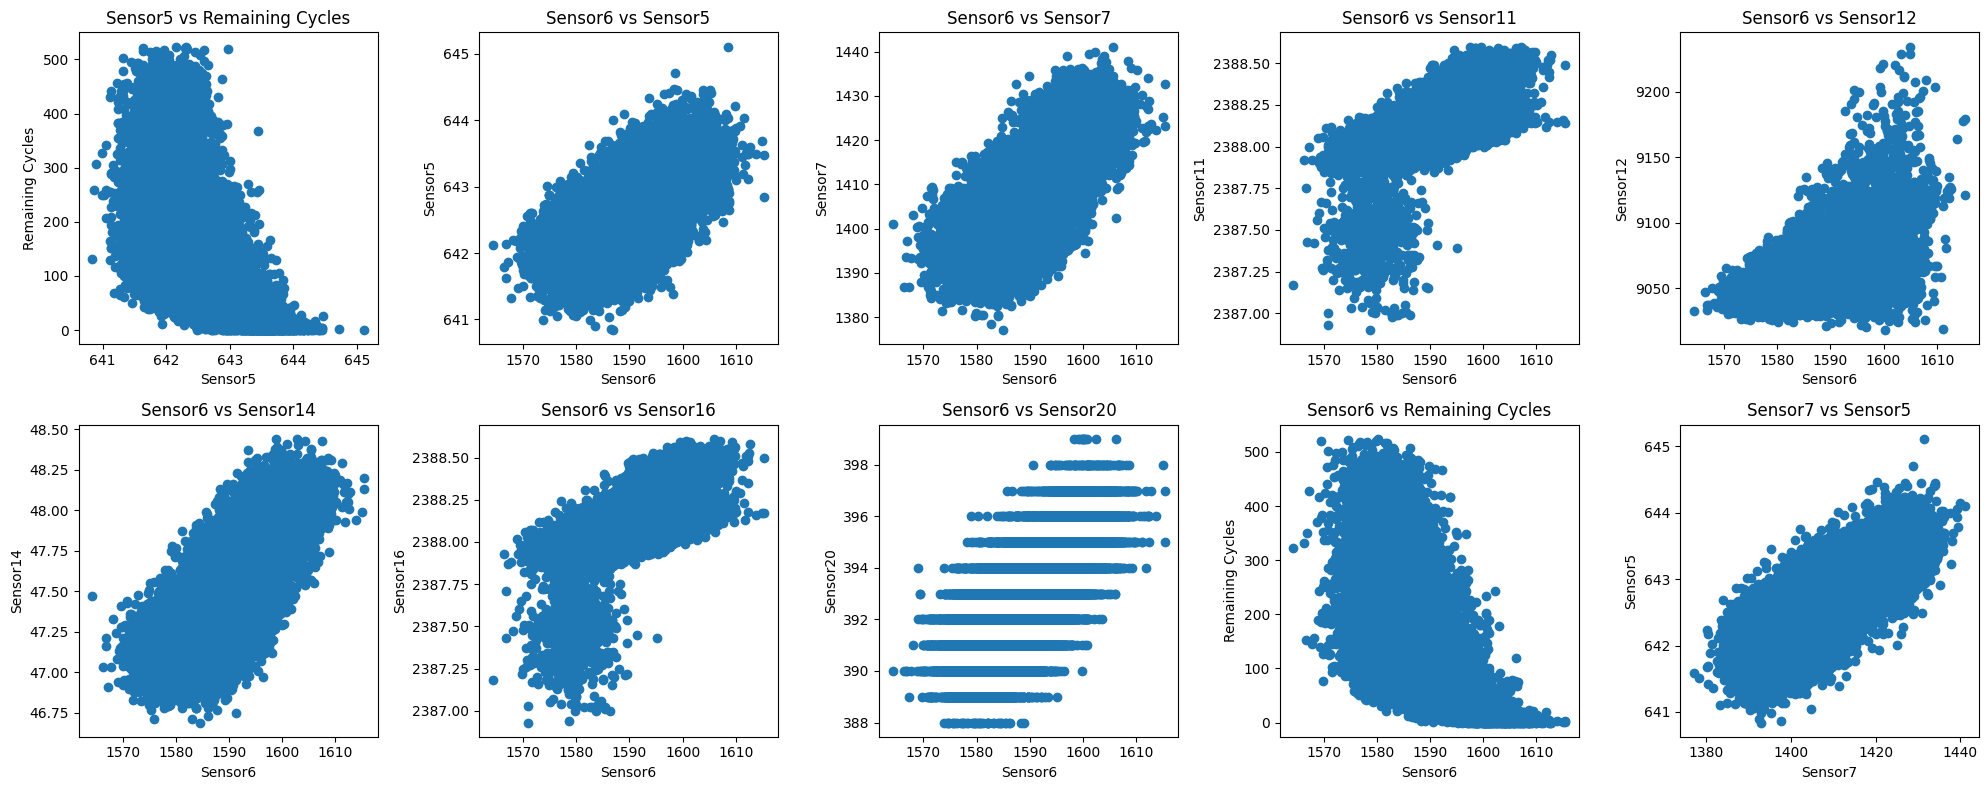

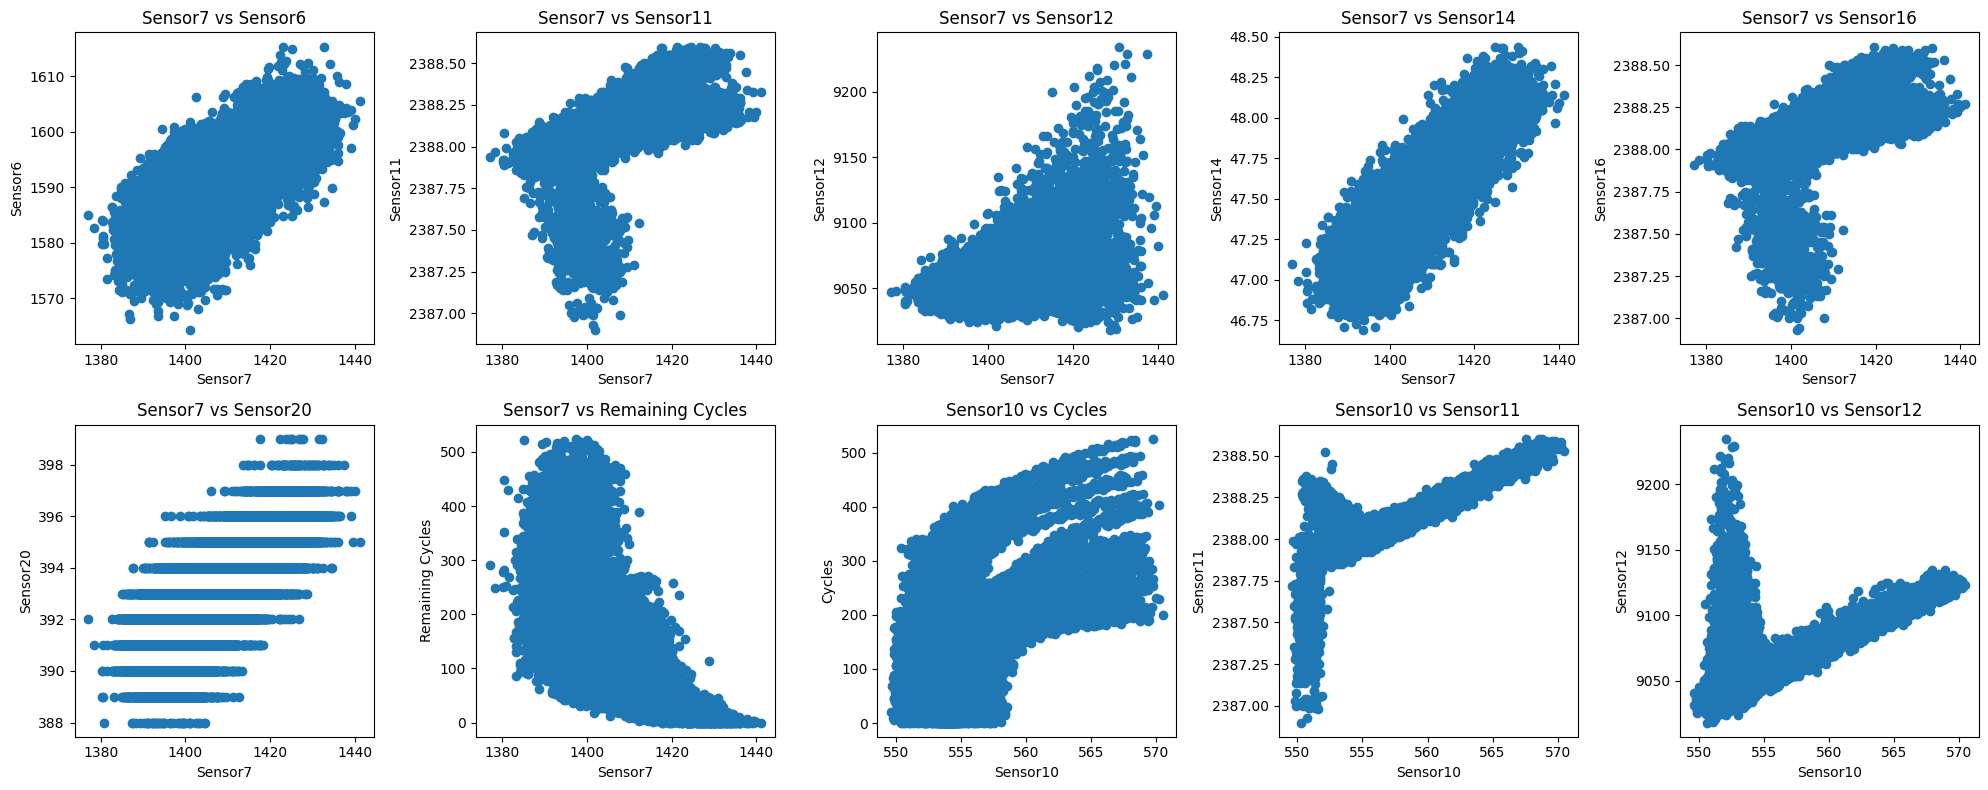

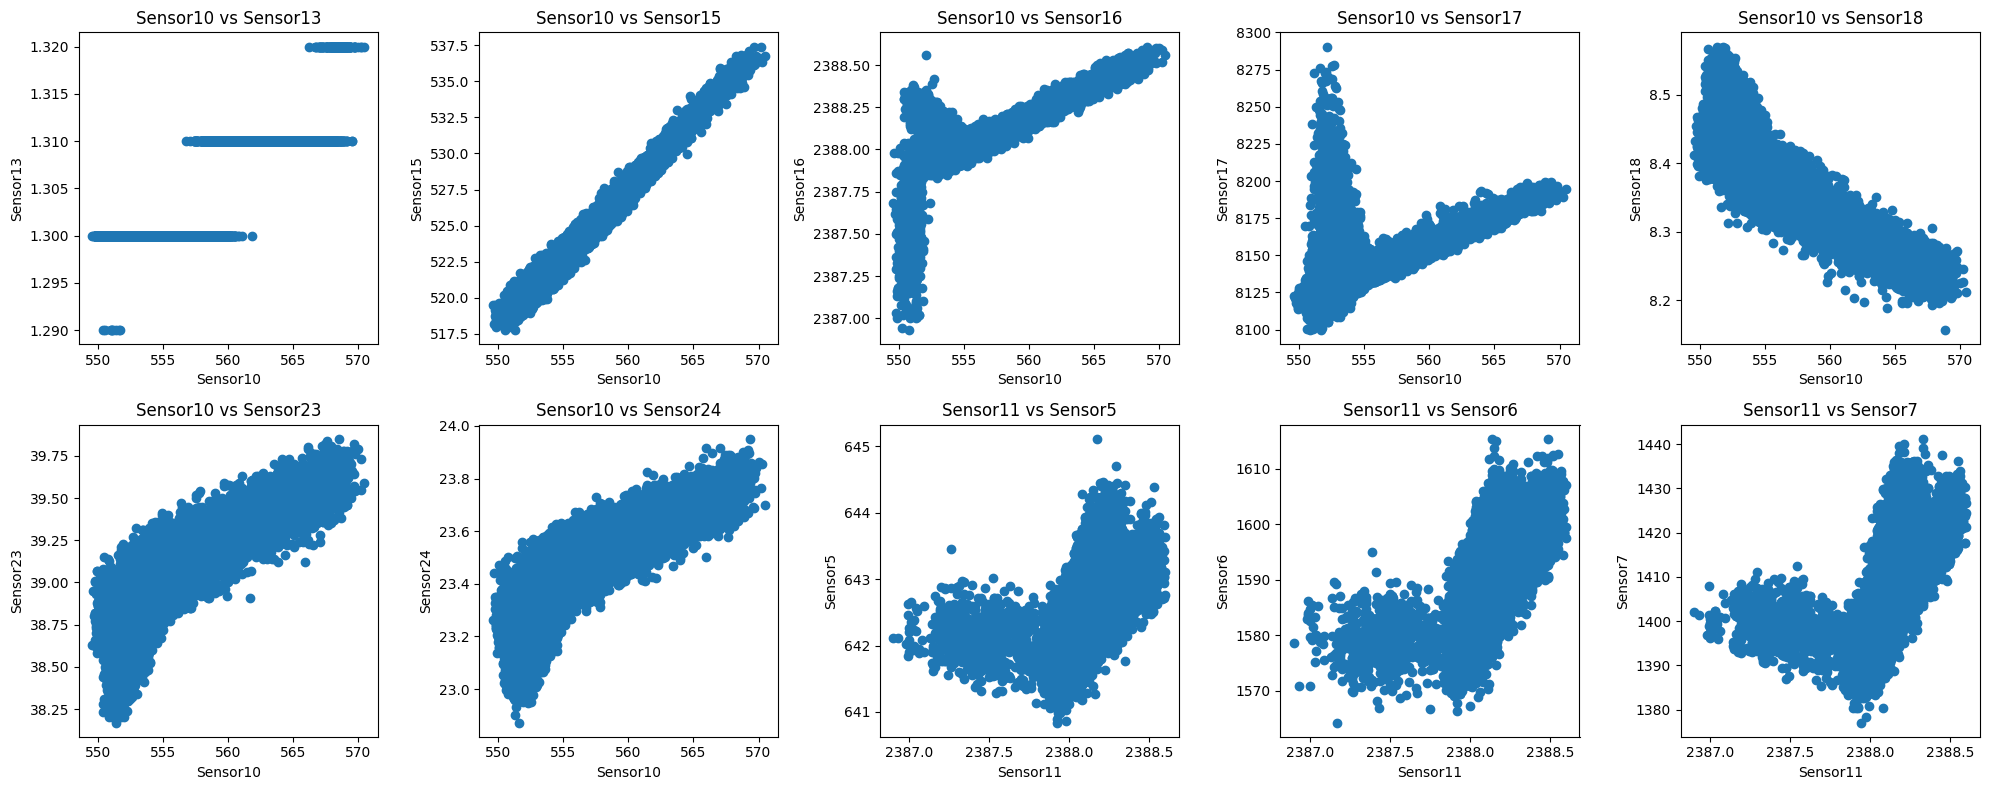

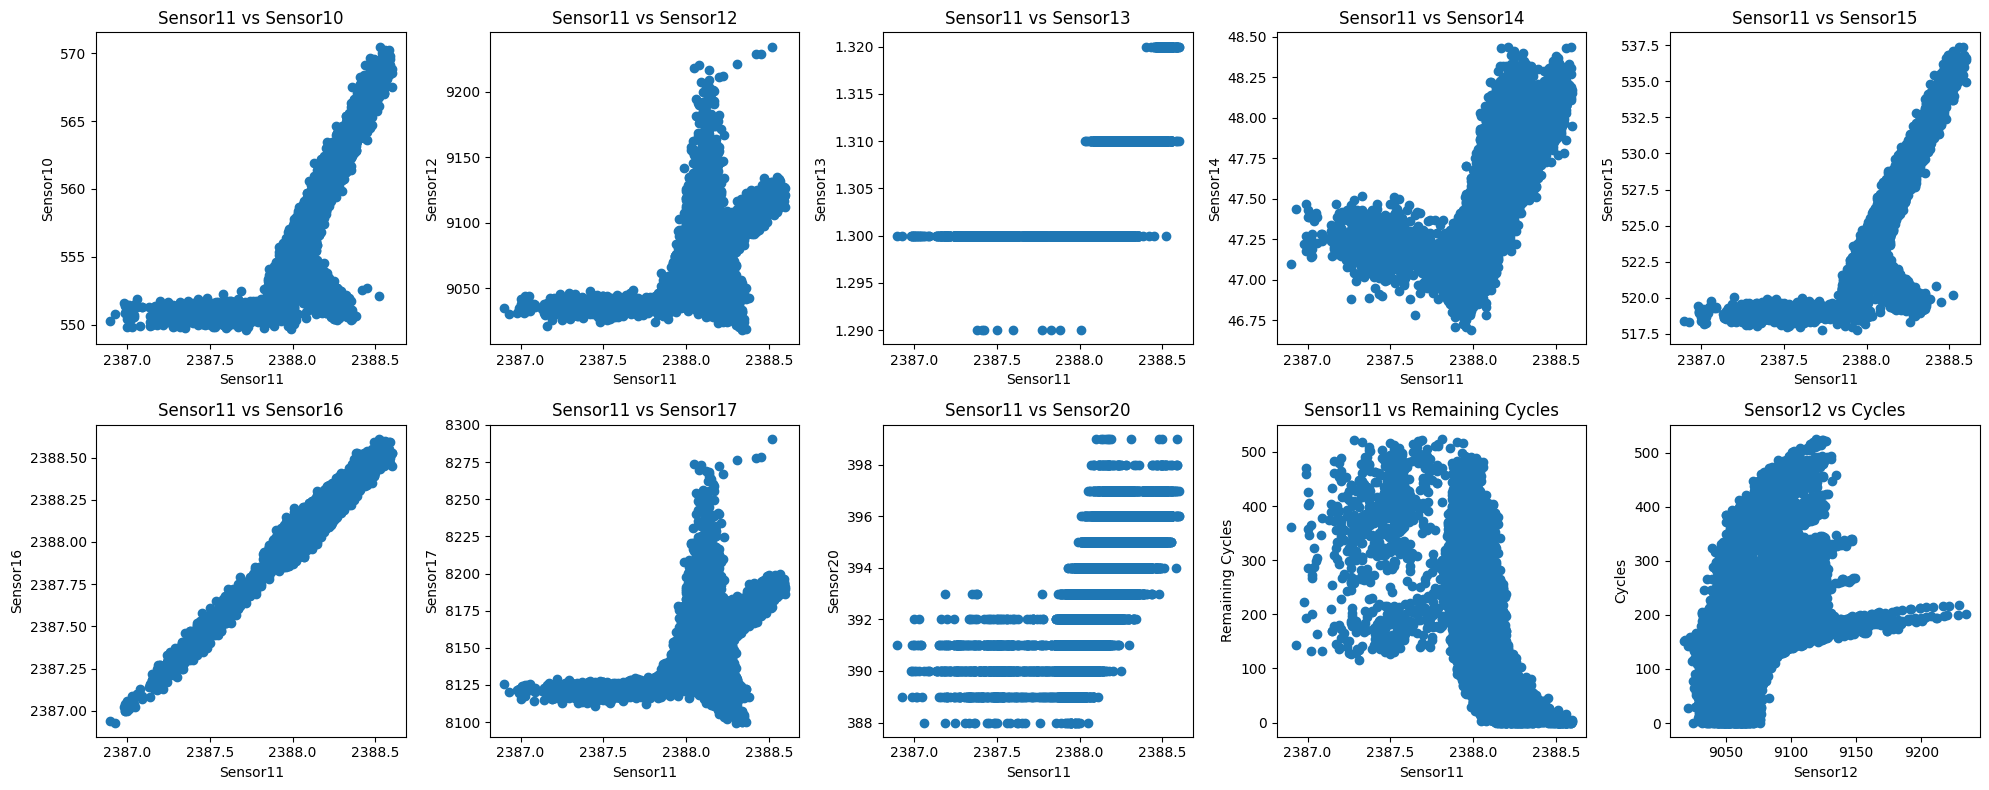

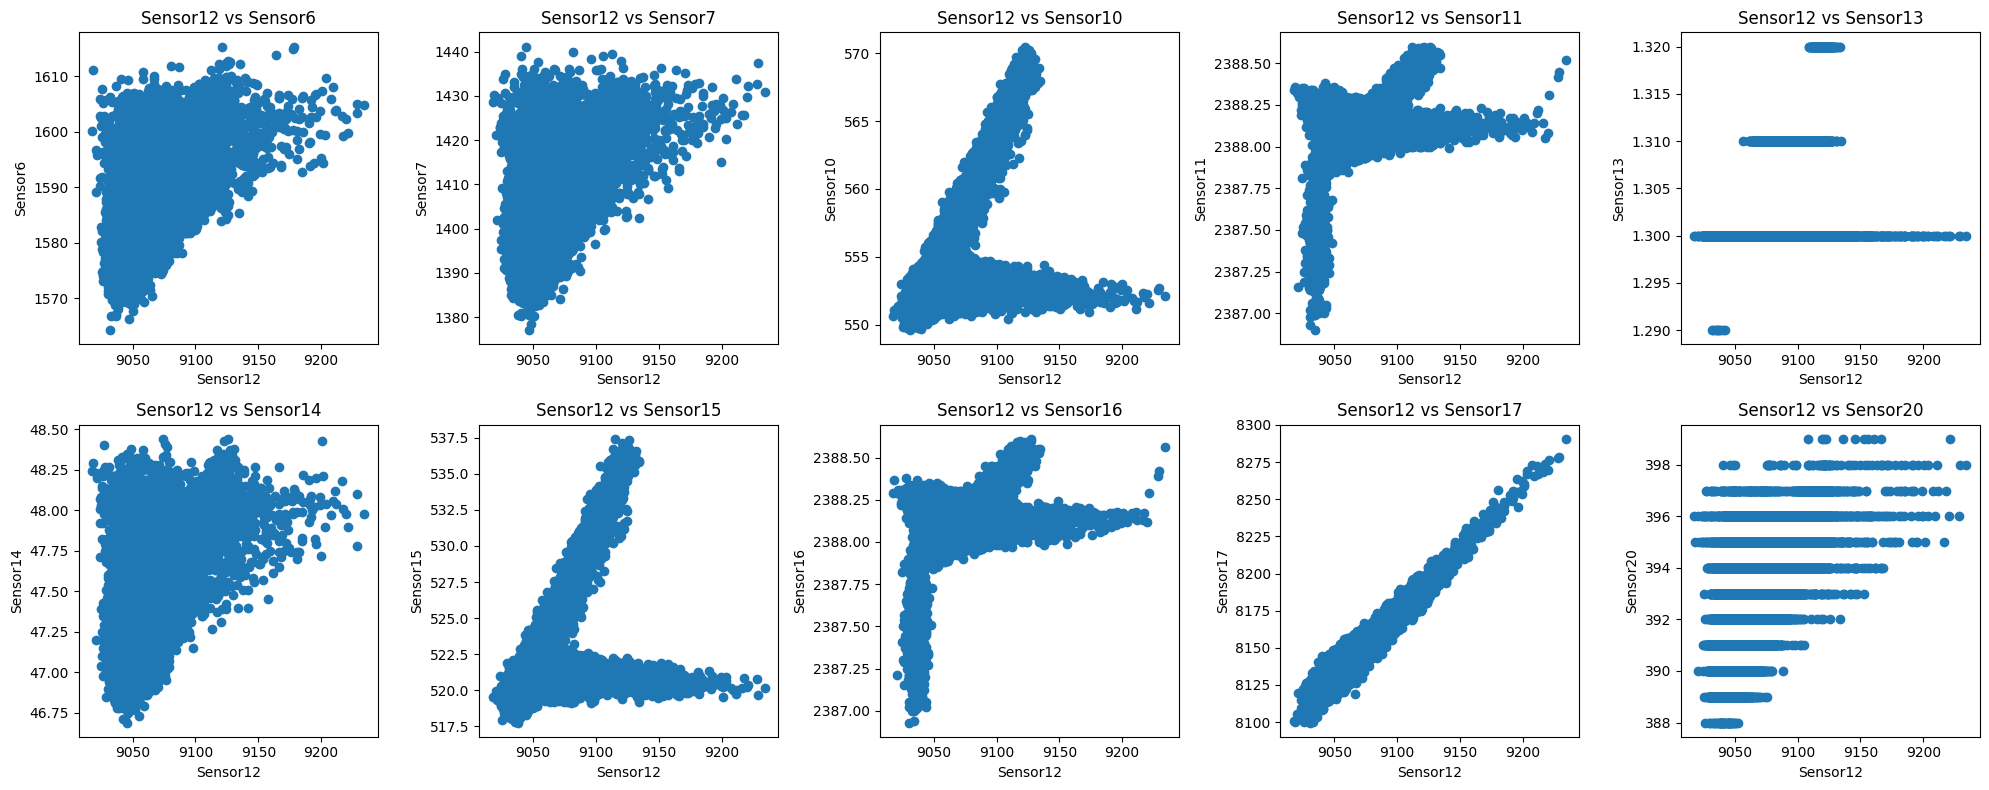

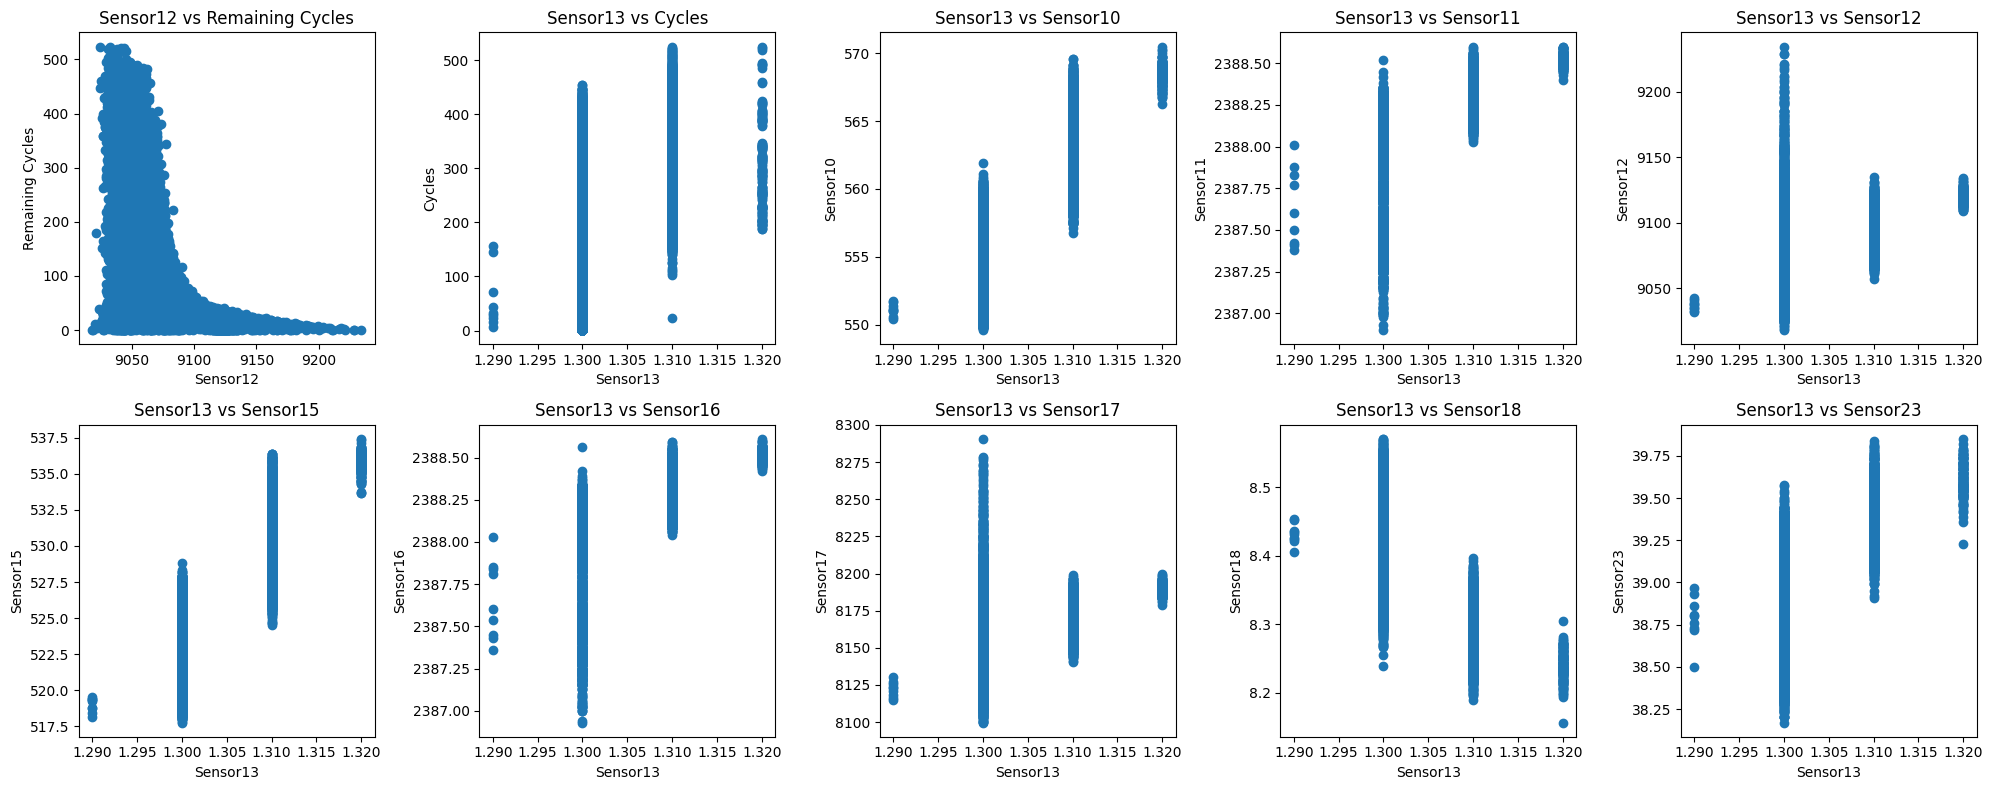

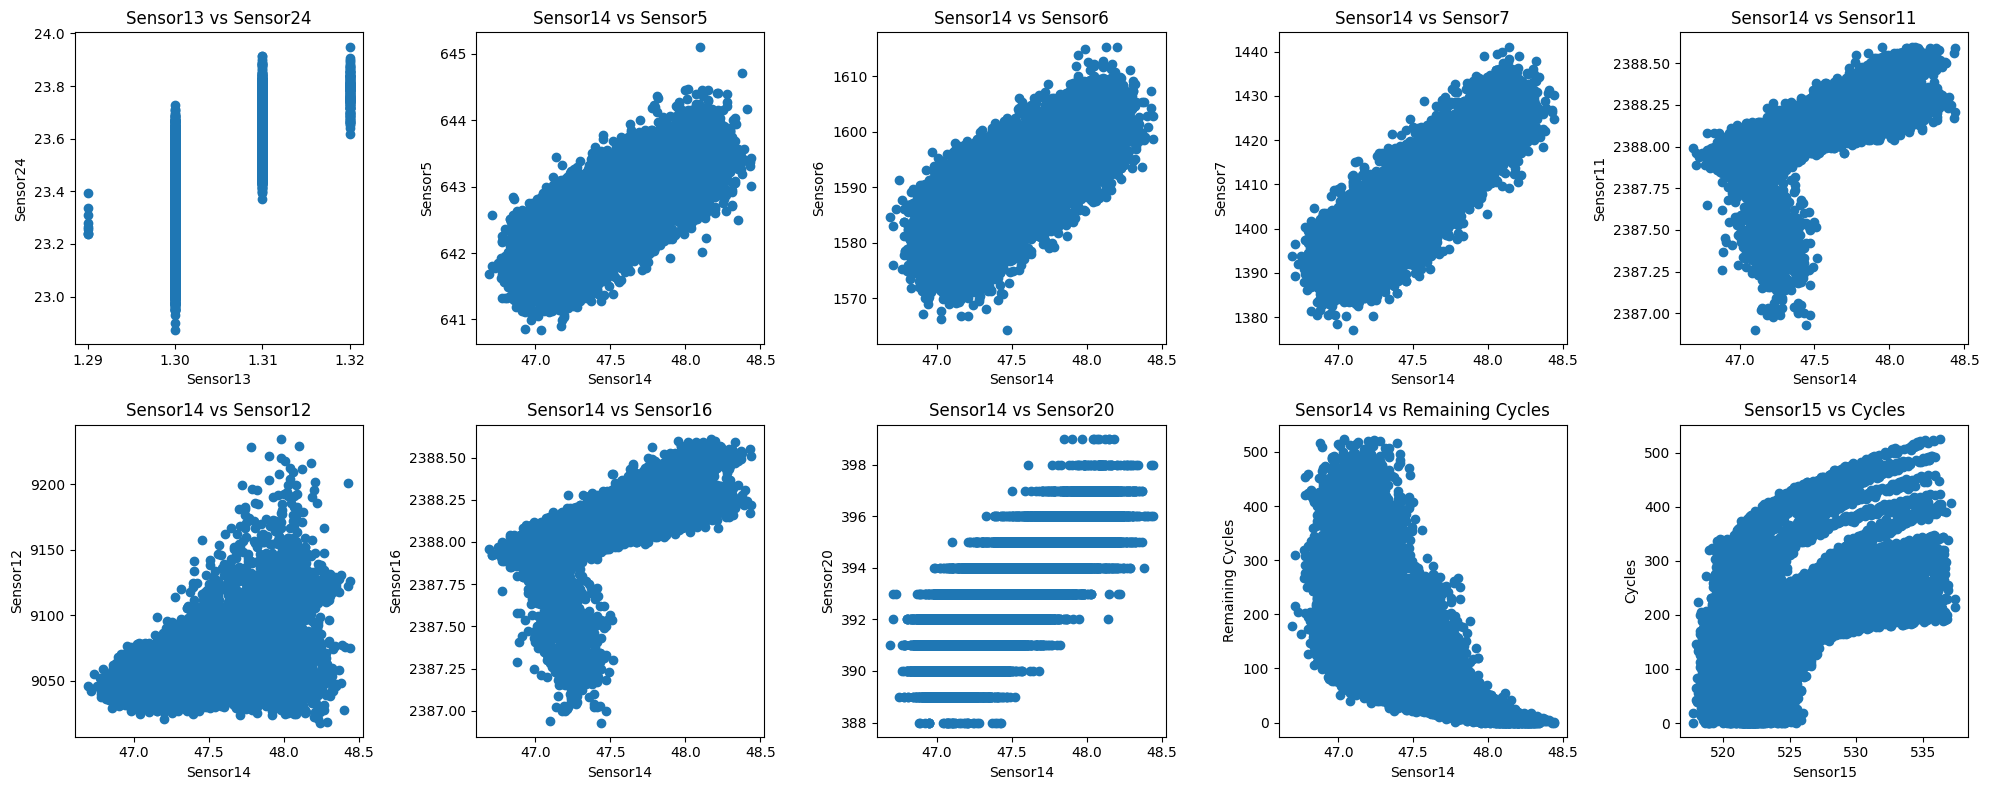

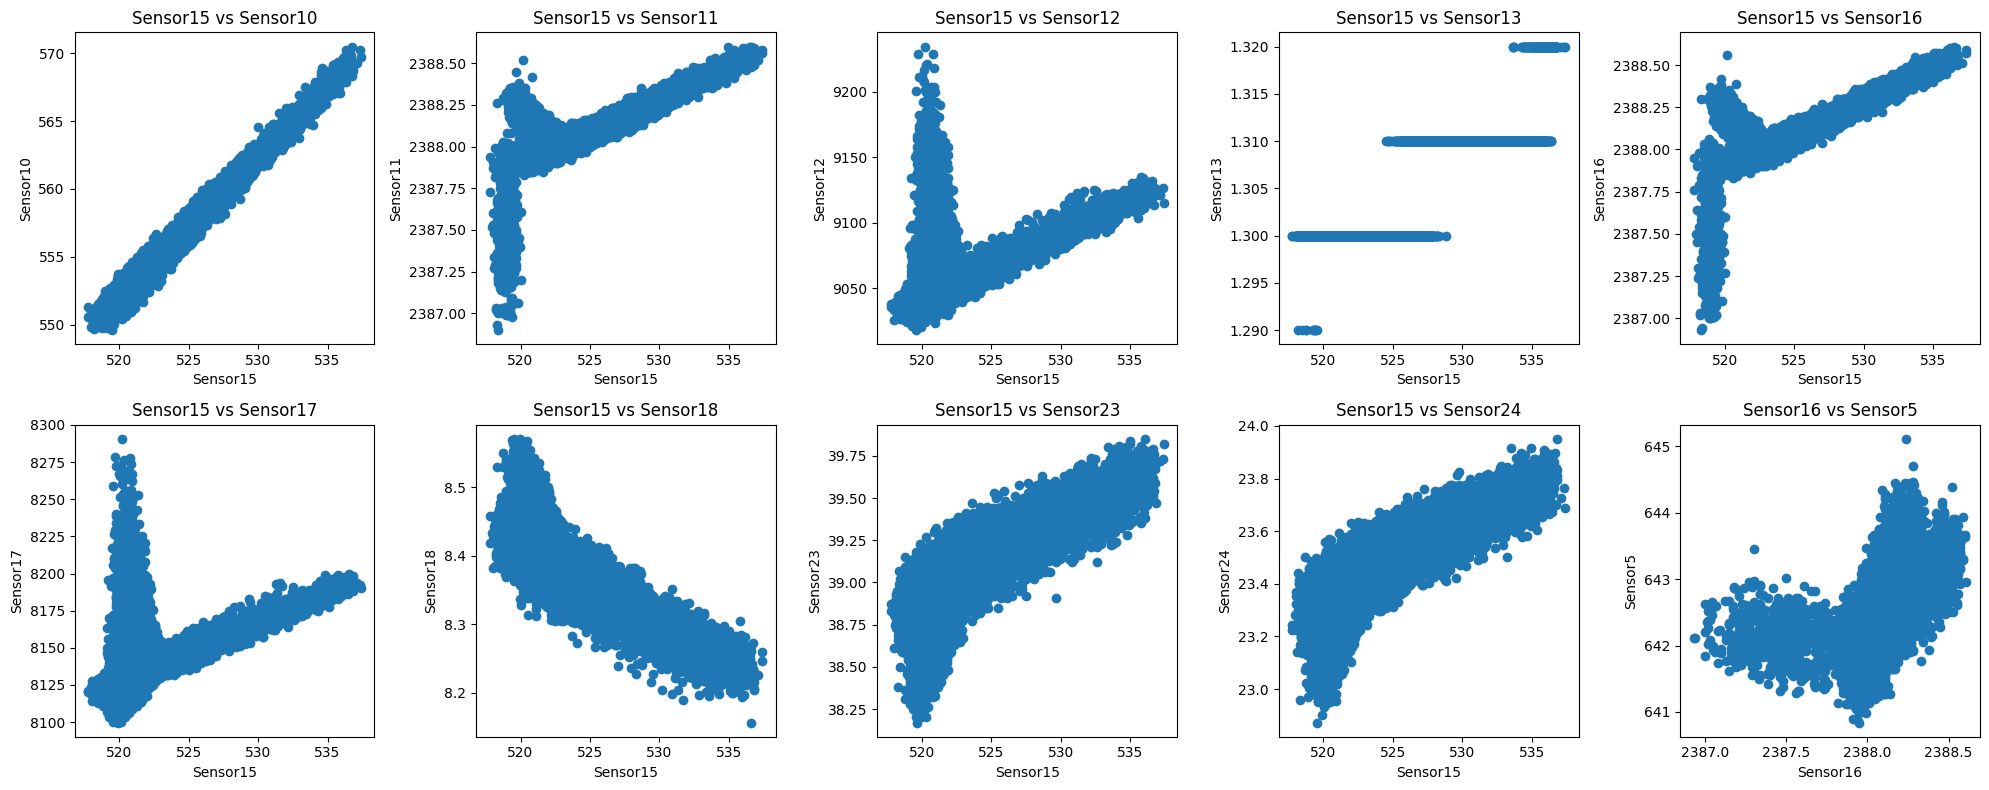

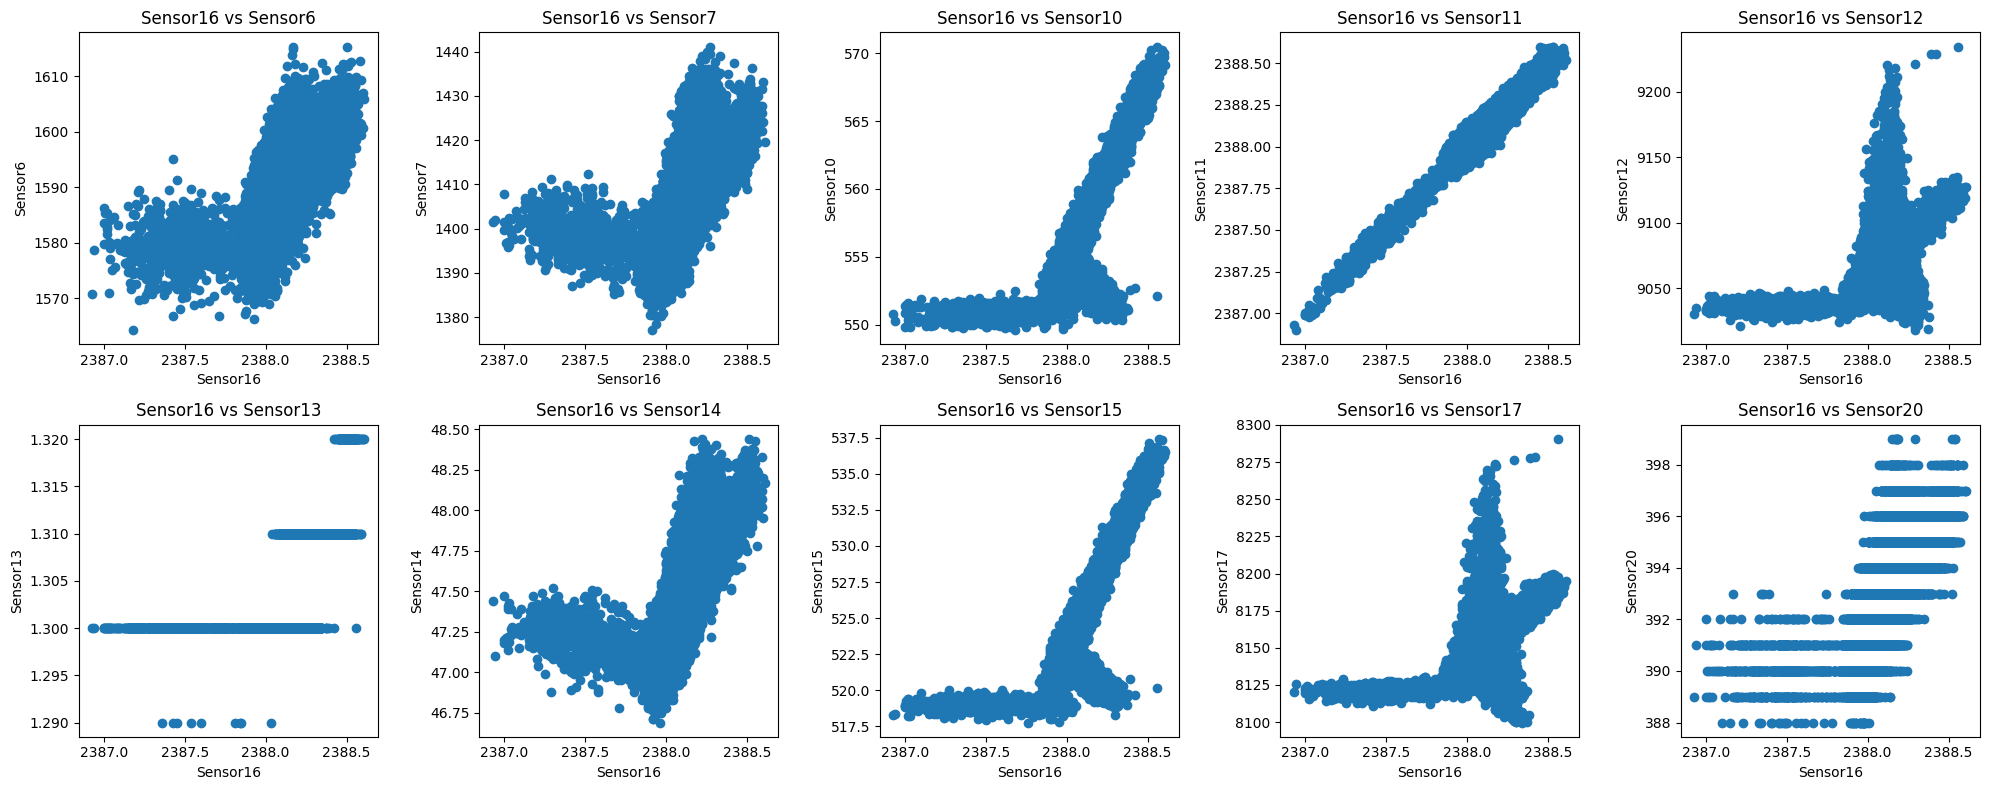

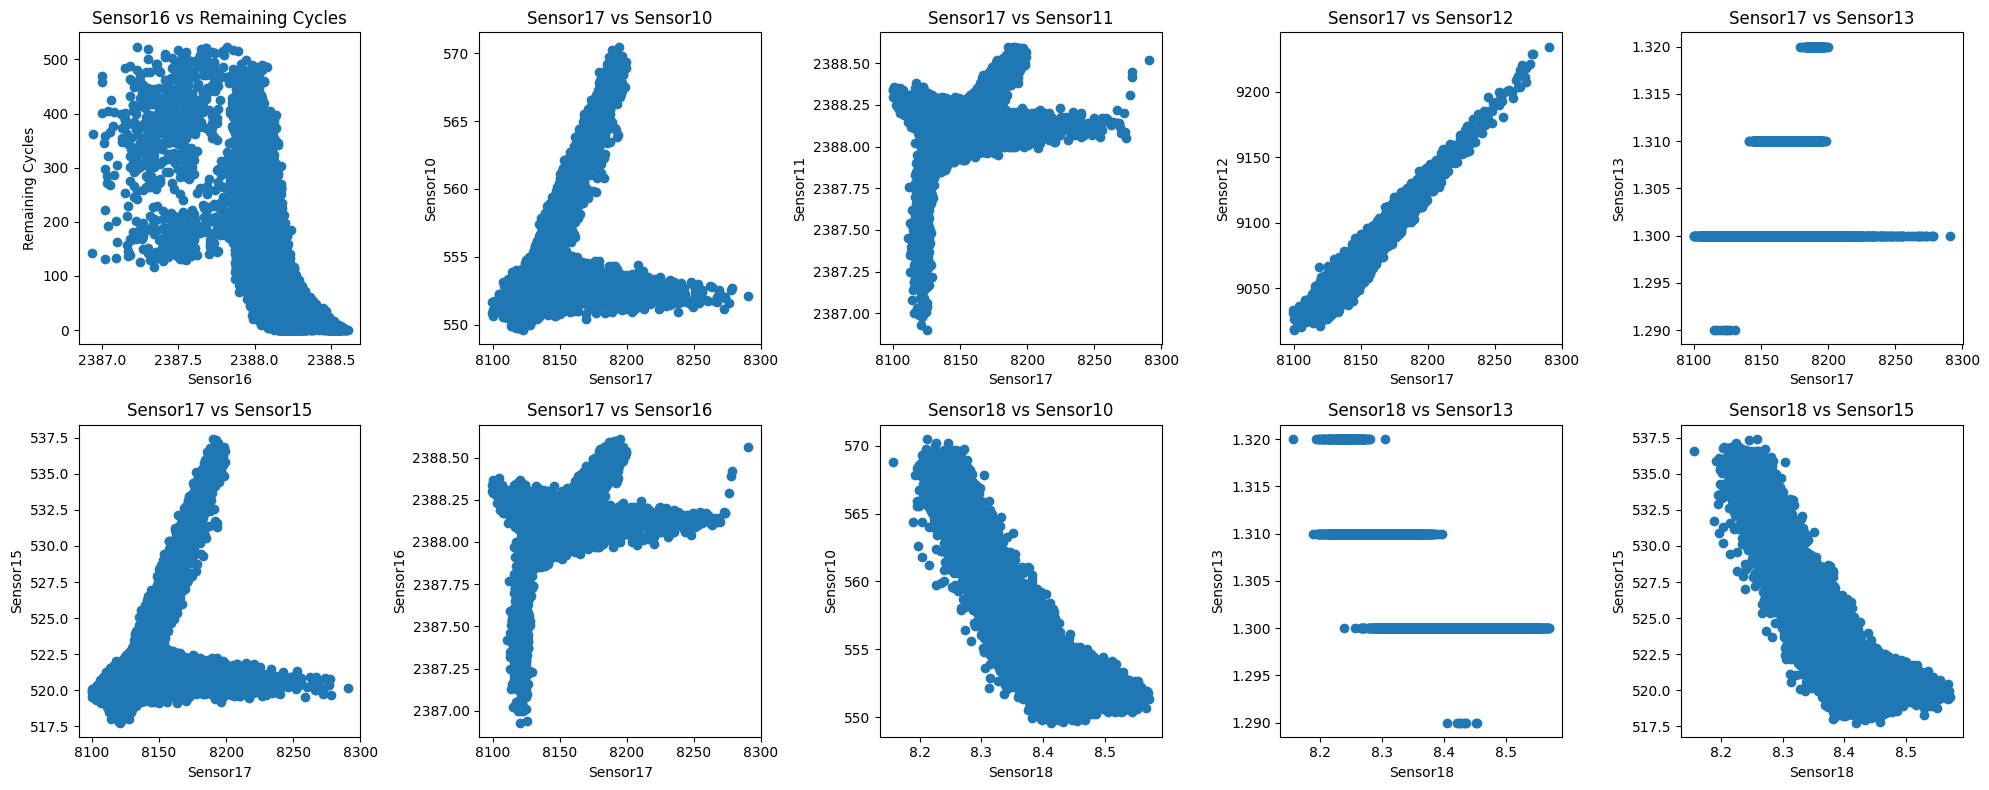

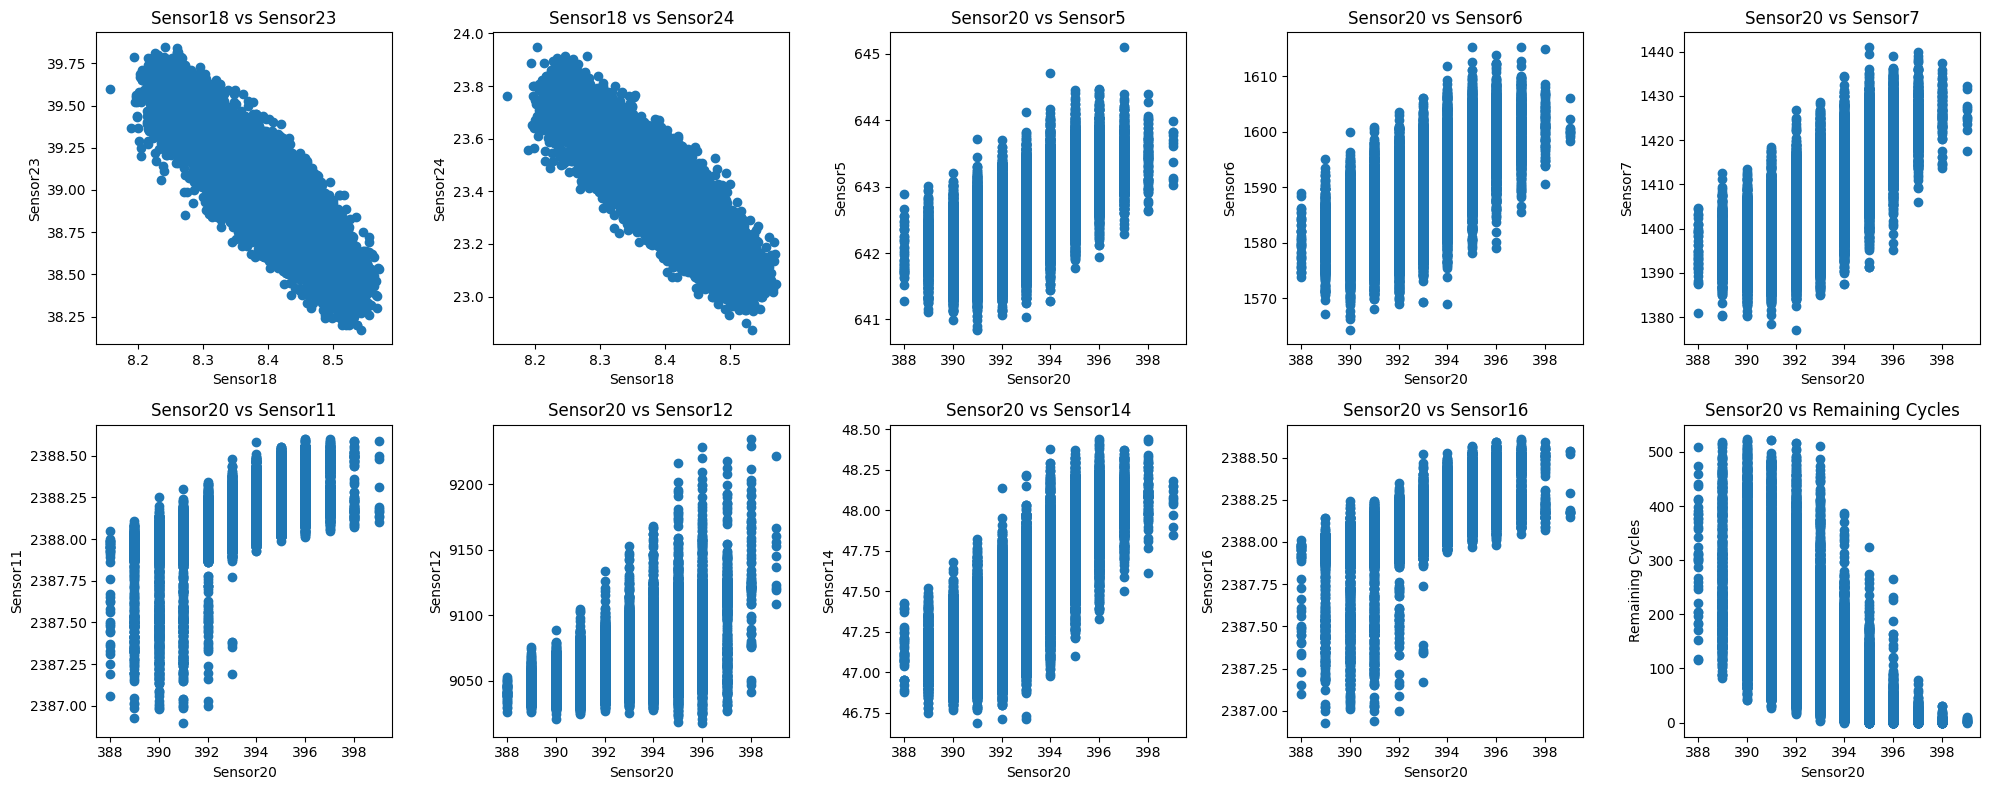

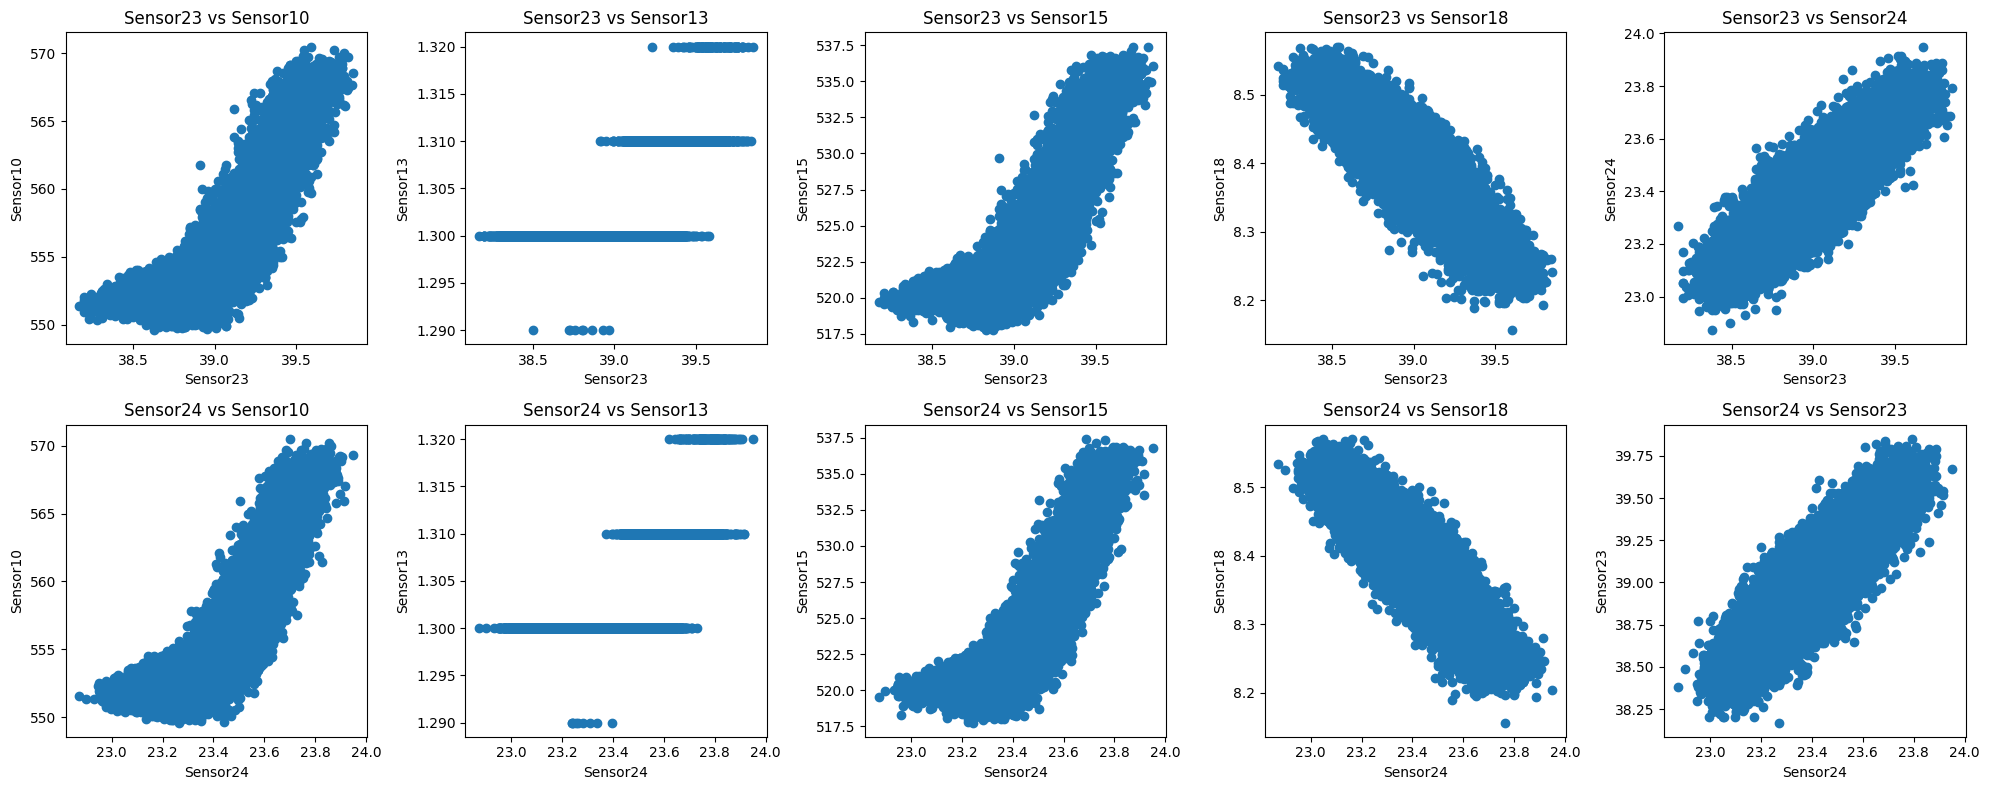

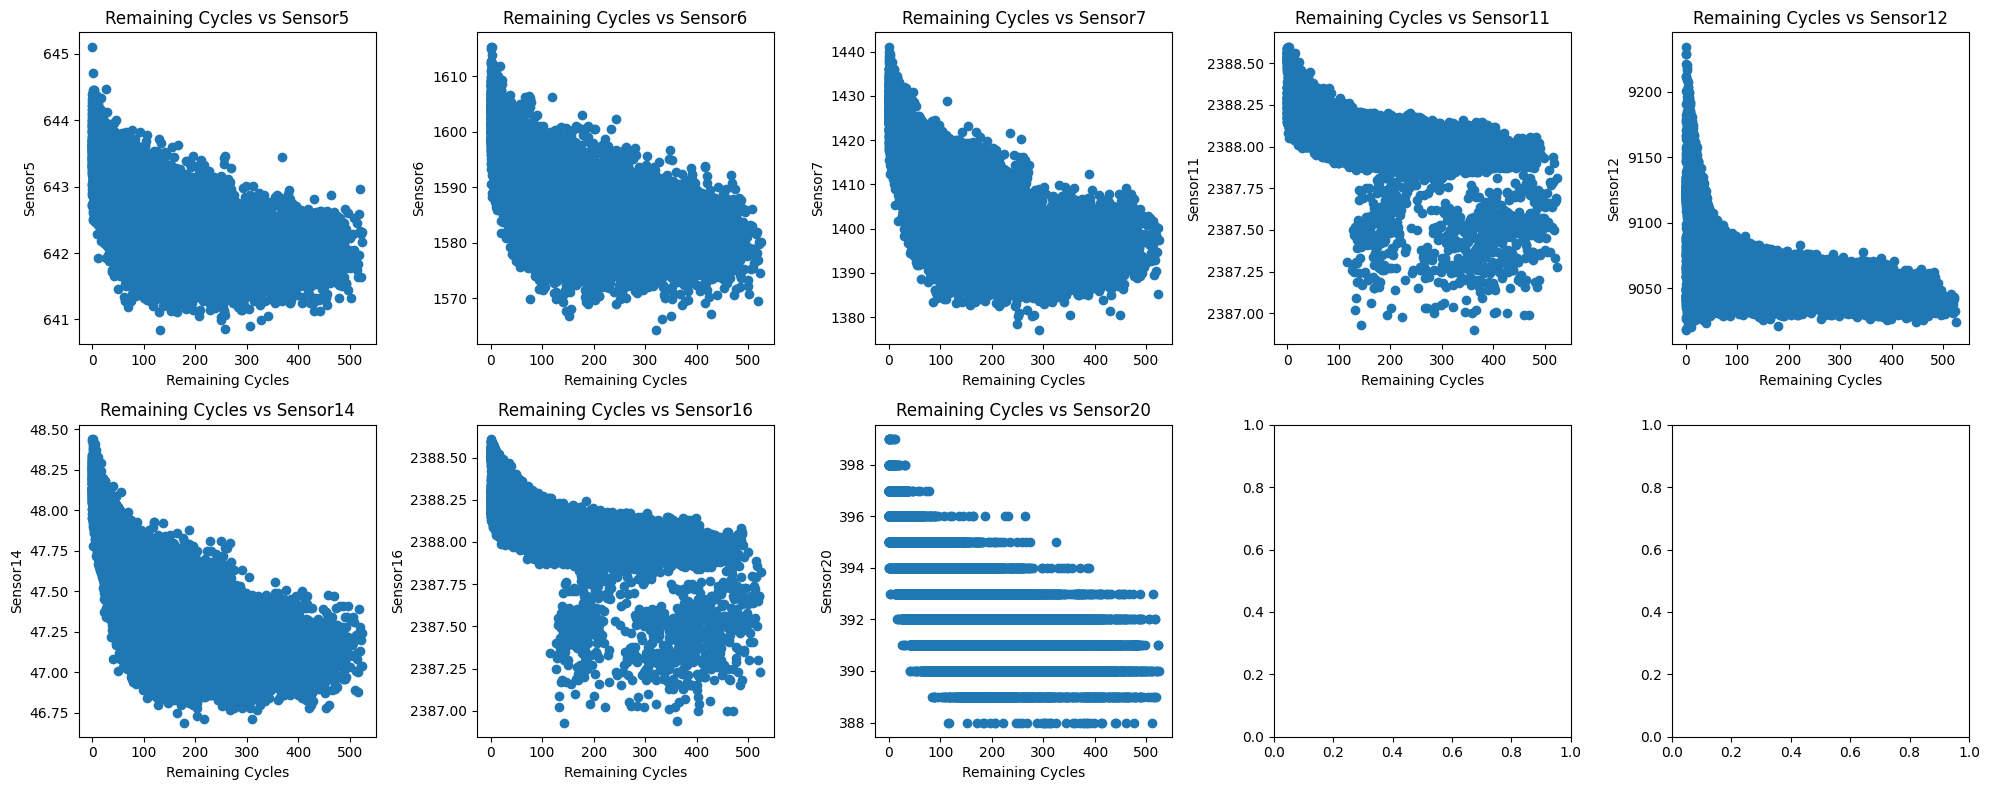

In [12]:
# Scatter plots for bivariate analysis based on Correlation Marrix Value.

corr_matrix = data.corr()
threshold = 0.5
sensors = data.columns

# Number of pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = pairs

for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()

    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)

    plt.tight_layout()  
    plt.show()